In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**QUALITY CONTROL = CLEANING**

**load data and read it**

In [4]:
import pandas as pd

df = pd.read_csv("/kaggle/input/salesdataset/sales_data.csv")
print('dataset read')


dataset read


**convert sale dates to date format**

In [5]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
print('done')

done


**duplicates and missing values**

**create useful features**

In [6]:
df['Month'] = df['Sale_Date'].dt.month
df['Year'] = df['Sale_Date'].dt.year

df[['Sales_Amount', 'Quantity_Sold', 'Unit_Price']].describe()


,Sales_Amount,Quantity_Sold,Unit_Price
count,1000.000000,1000.000000,1000.000000
mean,5019.265230,25.355000,2728.440120
std,2846.790126,14.159006,1419.399839
min,100.120000,1.000000,167.120000
25%,2550.297500,13.000000,1509.085000
50%,5019.300000,25.000000,2696.400000
75%,7507.445000,38.000000,3957.970000
max,9989.040000,49.000000,5442.150000


**EDA**

**sales by product category**

In [7]:
df.groupby('Product_Category')['Sales_Amount'].sum()

Product_Category
Clothing       1313474.36
Electronics    1243499.64
Food           1201773.54
Furniture      1260517.69
Name: Sales_Amount, dtype: float64

**sales by region**

In [8]:
df.groupby('Region')['Sales_Amount'].sum()

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64

**number of orders per discount**

In [13]:
df['Discount'].value_counts().sort_index()


Discount
0.00    16
0.01    37
0.02    24
0.03    39
0.04    38
0.05    26
0.06    31
0.07    33
0.08    31
0.09    38
0.10    37
0.11    22
0.12    39
0.13    31
0.14    31
0.15    29
0.16    21
0.17    42
0.18    28
0.19    27
0.20    39
0.21    39
0.22    44
0.23    28
0.24    42
0.25    40
0.26    33
0.27    37
0.28    27
0.29    33
0.30    18
Name: count, dtype: int64

**monthly sales trend**

In [10]:
df.groupby('Month')['Sales_Amount'].sum()

Month
1     495420.37
2     368919.36
3     402638.77
4     438992.61
5     389078.76
6     418458.34
7     374242.88
8     443171.28
9     367837.60
10    460378.78
11    467482.90
12    392643.58
Name: Sales_Amount, dtype: float64

**impact of discount**

In [11]:
df.groupby('Discount')['Sales_Amount'].sum()

Discount
0.00     72183.92
0.01    188823.74
0.02    106443.98
0.03    218589.59
0.04    198912.94
0.05    149287.37
0.06    137402.77
0.07    151797.97
0.08    153997.39
0.09    182184.97
0.10    172435.74
0.11     99038.30
0.12    187918.32
0.13    169457.16
0.14    161361.44
0.15    131987.69
0.16     92771.80
0.17    192421.80
0.18    118627.75
0.19    146974.16
0.20    234195.69
0.21    184307.70
0.22    245214.09
0.23    168363.13
0.24    238080.99
0.25    172556.56
0.26    185429.64
0.27    163908.74
0.28    123922.12
0.29    175265.51
0.30     95402.26
Name: Sales_Amount, dtype: float64

**visualization**

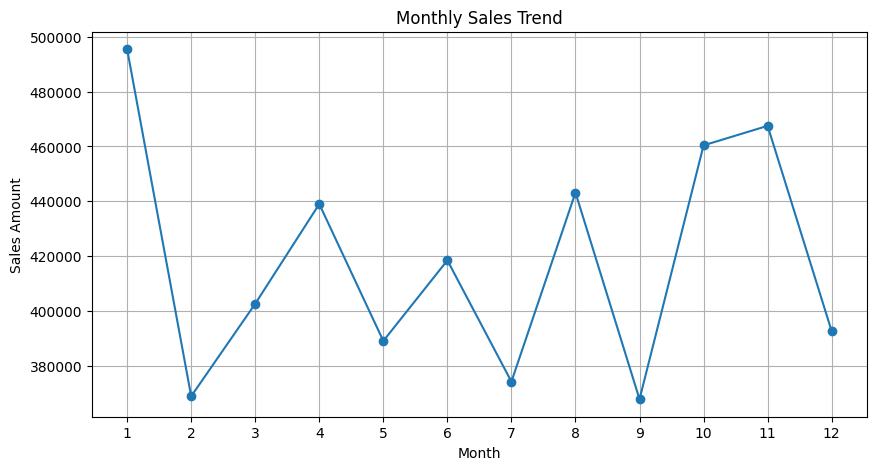

In [12]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Sales_Amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


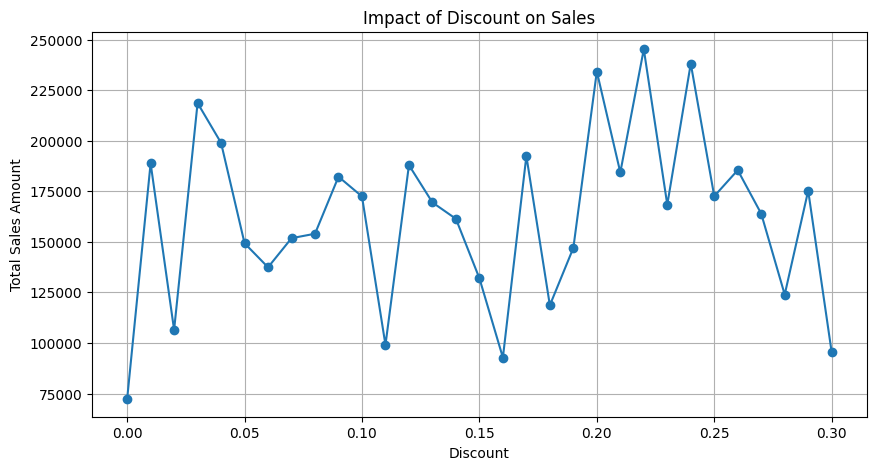

In [14]:
discount_sales = df.groupby('Discount')['Sales_Amount'].sum()
discount_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

